In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('advertising.csv')

<h2>EDA</h2>

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [19]:
df.shape

(200, 4)

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

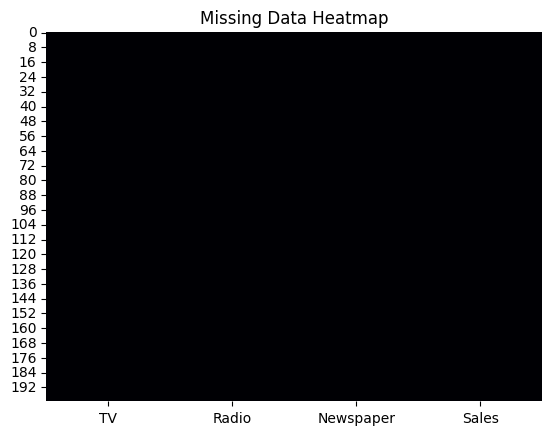

In [20]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title("Missing Data Heatmap")
plt.show()

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


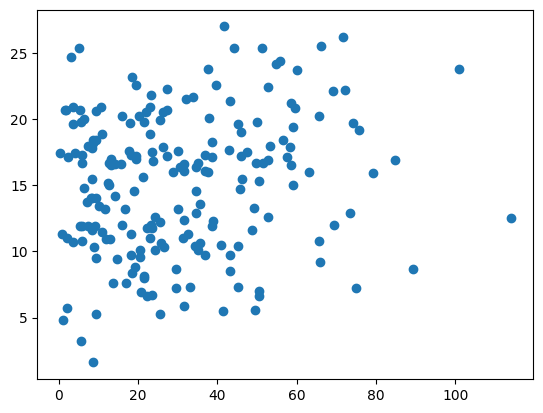

In [10]:
plt.scatter(df['Newspaper'],df['Sales'])
plt.show()

<Axes: ylabel='Newspaper'>

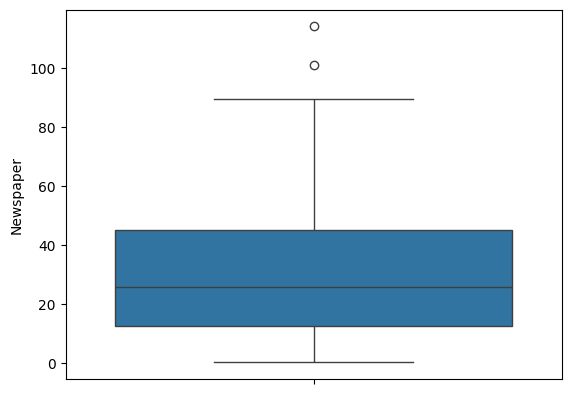

In [28]:
sns.boxplot(df['Newspaper'])

C:\Users\rani\AppData\Local\Temp\ipykernel_30192\216798090.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Radio'],bins=30,hist=False)


<Axes: xlabel='Radio', ylabel='Density'>

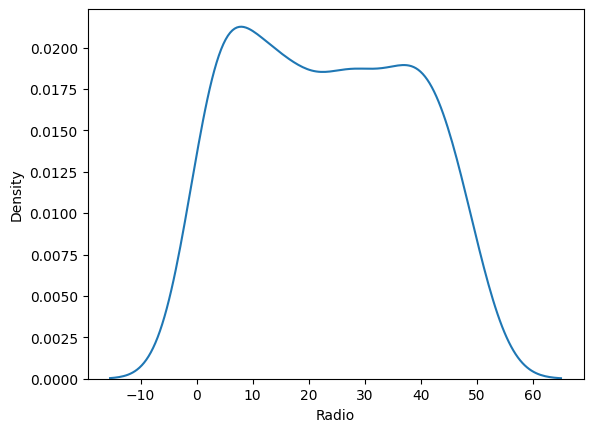

In [4]:
sns.distplot(df['Radio'],bins=30,hist=False)

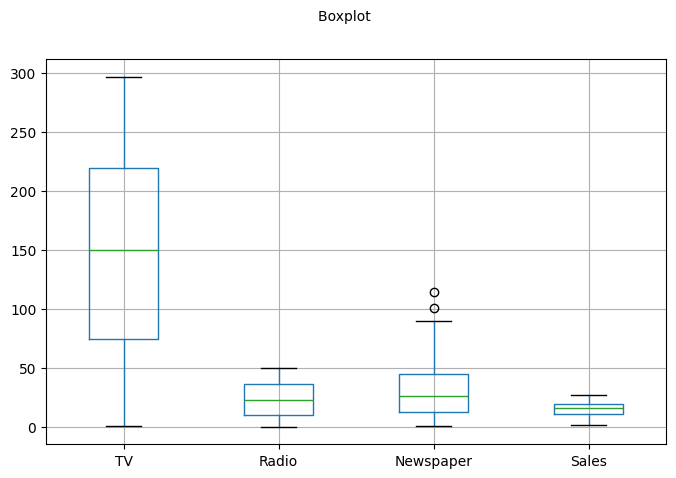

In [96]:
df.boxplot(figsize=(8, 5))
plt.suptitle("Boxplot ", fontsize=10)
plt.show()

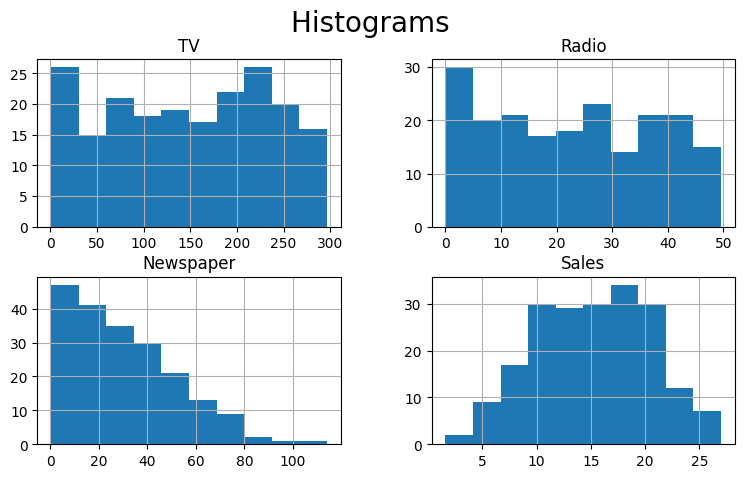

In [6]:
df.hist(figsize=(9, 5))
plt.suptitle("Histograms ", fontsize=20)
plt.show()

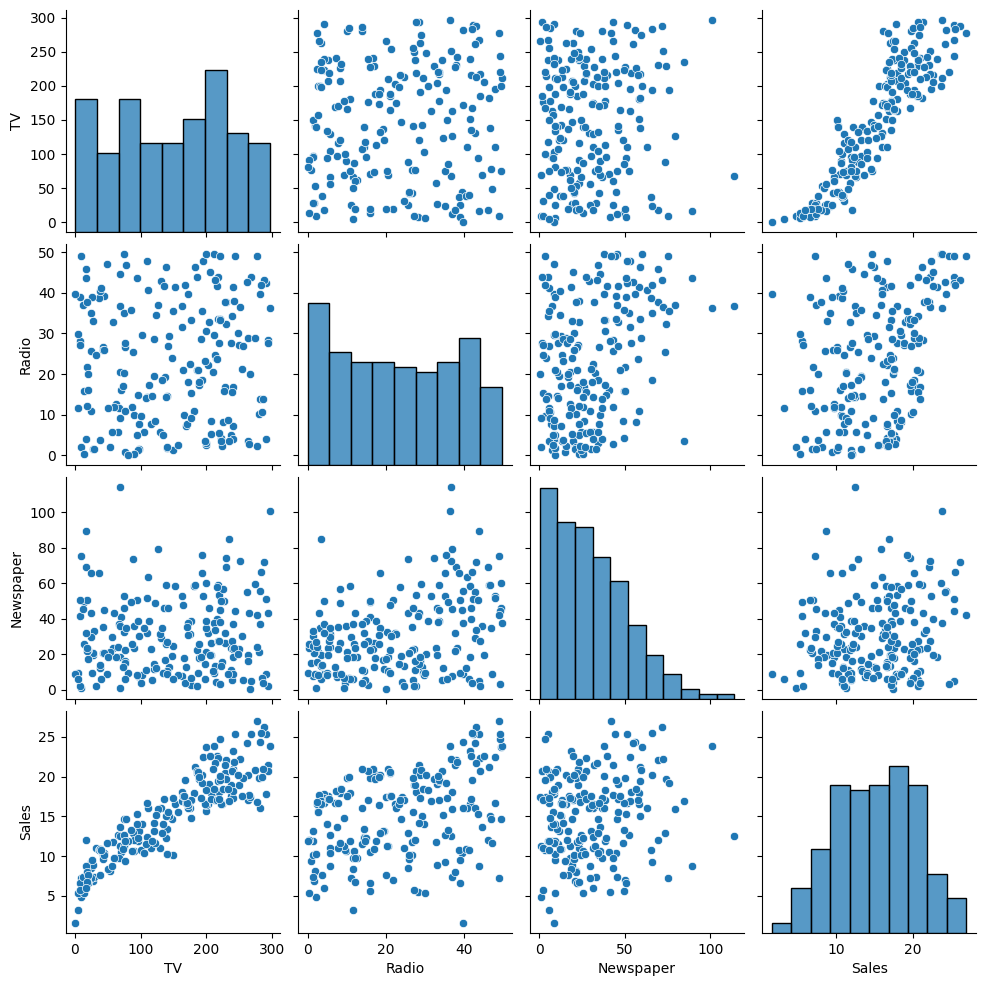

In [32]:
sns.pairplot(df)
#plt.suptitle("Pairplot of All Features", y=1.02)
plt.show()

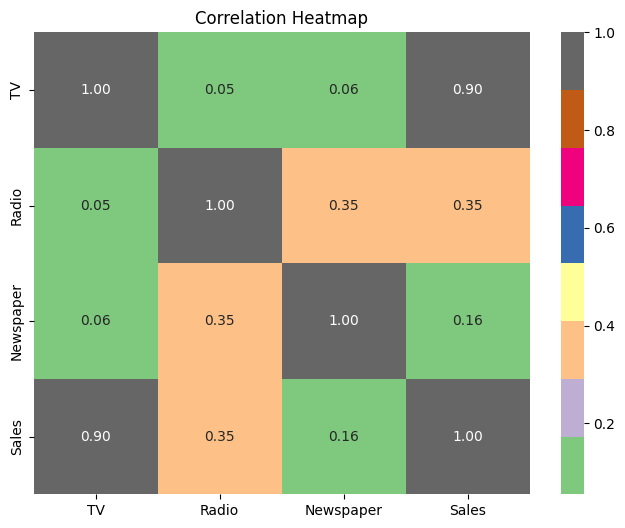

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='Accent', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [41]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers


TV           0
Radio        0
Newspaper    2
Sales        0
dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0],
                                               df.iloc[:,-1],
                                               test_size=0.2)
                                               
                                               

In [7]:
x = df['TV'].values
y = df['Sales'].values
mean_x = np.mean(x)
mean_y = np.mean(y)

In [10]:

#y=mx+c
num = np.sum((x - mean_x) * (y - mean_y))
denom = np.sum((x - mean_x) ** 2)

m = num / denom
c = mean_y - b1 * mean_x

print("Slope:", m)
print("Intercept: ", c)

Slope: 0.055464770469558854
Intercept:  6.974821488229894


In [11]:
y_pred = c + m * x


<h5>Here we have taken 1 feature as x(x_train,x_test) and reshaped it into 2D array as fit need 2D</h5>

In [81]:
x_train=x_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)


C:\Users\rani\AppData\Local\Temp\ipykernel_30192\3007237789.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


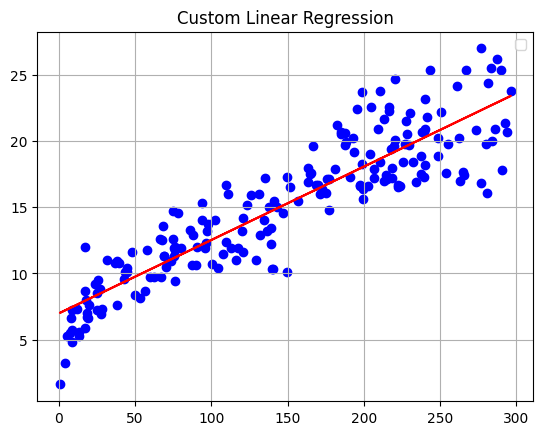

In [13]:
#first we plotted original points then we plotted predict line
plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,color='red')
plt.title('Custom Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
mse = np.mean((y - y_pred) ** 2)
mse

np.float64(5.2177438977951285)

In [16]:
ss_mean = np.sum((y - mean_y) ** 2)
ss_reg = np.sum((y - y_pred) ** 2)

r2 = 1 - (ss_reg / ss_mean)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 5.2177438977951285
R² Score: 0.8121757029987414


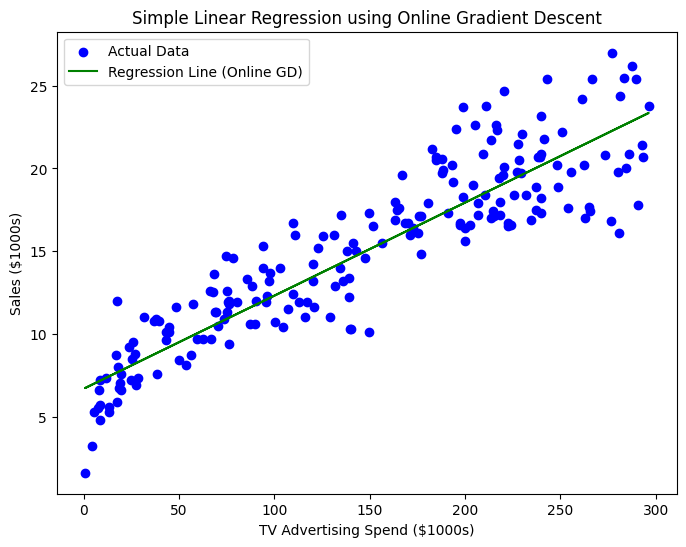

Slope (b1): 0.0563
Intercept (b0): 6.6814


In [17]:
X = df['TV'].values.reshape(-1, 1)
y = df['Sales'].values.reshape(-1, 1)

# Feature scaling
X_scaled = (X - np.mean(X)) / np.std(X)

# Add bias term (X_b = [1, X_scaled])
X_b = np.c_[np.ones((X.shape[0], 1)), X_scaled]

# Online Gradient Descent (SGD)
def online_gradient_descent(X, y, learning_rate=0.01, n_epochs=10):
    m = len(y)
    theta = np.zeros((2, 1))

    for epoch in range(n_epochs):
        for i in range(m):
            xi = X[i:i+1]
            yi = y[i:i+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients

        # Compute and print MSE at end of each epoch
        y_pred = X.dot(theta)
        mse = np.mean((y_pred - y) ** 2)

    return theta

# Train the model
theta_sgd = online_gradient_descent(X_b, y, learning_rate=0.01, n_epochs=20)

# Predict
y_pred_sgd = X_b.dot(theta_sgd)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_sgd, color='green', label='Regression Line (Online GD)')
plt.xlabel("TV Advertising Spend ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Simple Linear Regression using Online Gradient Descent")
plt.legend()
plt.show()

# Map back to original scale
std_x = np.std(df['TV'])
mean_x = np.mean(df['TV'])

b1_original_sgd = theta_sgd[1][0] / std_x
b0_original_sgd = theta_sgd[0][0] - b1_original_sgd * mean_x

print(f"Slope (b1): {b1_original_sgd:.4f}")
print(f"Intercept (b0): {b0_original_sgd:.4f}")

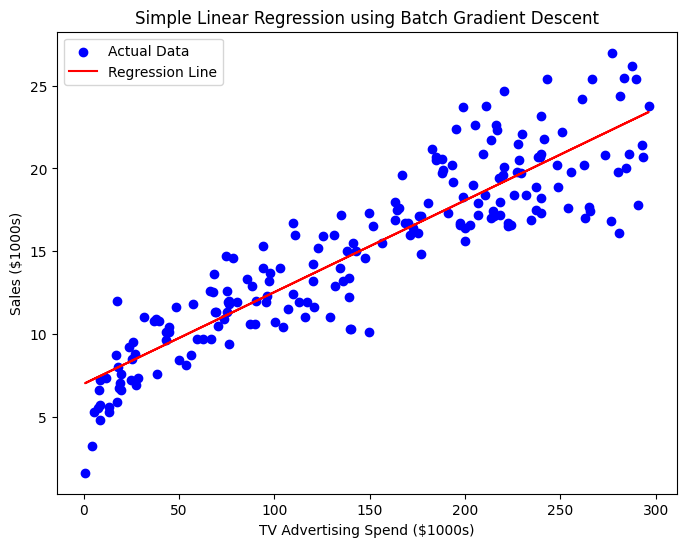

Slope (b1): 0.0555
Intercept (b0): 6.9748


In [18]:
X = df['TV'].values.reshape(-1, 1)
y = df['Sales'].values.reshape(-1, 1)

# Feature scaling (important to avoid NaNs in gradient descent)
X_scaled = (X - np.mean(X)) / np.std(X)

# Add bias (X_b = [1, X_scaled])
X_b = np.c_[np.ones((X.shape[0], 1)), X_scaled]

# Batch Gradient Descent function
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.zeros((2, 1))  # [b0, b1]

    for iteration in range(n_iterations):
        gradients = (2 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients

        # Print MSE every 100 iterations
        if iteration % 100 == 0:
            mse = np.mean((X.dot(theta) - y) ** 2)

    return theta

# Train the model
theta = batch_gradient_descent(X_b, y, learning_rate=0.01, n_iterations=1000)

# Predict on original scale
y_pred = X_b.dot(theta)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel("TV Advertising Spend ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Simple Linear Regression using Batch Gradient Descent")
plt.legend()
plt.show()

# Display slope and intercept in original scale
# We trained on standardized X, so map back:
std_x = np.std(df['TV'])
mean_x = np.mean(df['TV'])

b1_original = theta[1][0] / std_x
b0_original = theta[0][0] - b1_original * mean_x

print(f"Slope (b1): {b1_original:.4f}")
print(f"Intercept (b0): {b0_original:.4f}")

In [19]:
def compute_mse(y_true, y_pred):
    errors = y_true - y_pred
    mse = np.mean(errors ** 2)
    return mse

def compute_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

# Simple Linear Regression without sklearn
y_pred_simple = b0 + b1 * X

# Evaluate Simple Linear Regression
mse_simple = compute_mse(y, y_pred_simple)
r2_simple = compute_r2(y, y_pred_simple)

print("Simple Linear Regression Results (Without sklearn)")
print(f"    MSE  = {mse_simple:.4f}")
print(f"    R²   = {r2_simple:.4f}")


# Evaluate Batch Gradient Descent
# Need to re-calculate y_pred_batch on the full dataset X_b
y_pred_batch = X_b.dot(theta)

mse_batch = compute_mse(y, y_pred_batch)
r2_batch = compute_r2(y, y_pred_batch)

print("\nBatch Gradient Descent Results")
print(f"    MSE  = {mse_batch:.4f}")
print(f"    R²   = {r2_batch:.4f}")

# Evaluate Online Gradient Descent
# Need to re-calculate y_pred_online on the full dataset X_b
y_pred_online = X_b.dot(theta_sgd)

mse_online = compute_mse(y, y_pred_online)
r2_online = compute_r2(y, y_pred_online)

print("\nOnline Gradient Descent Results")
print(f"    MSE  = {mse_online:.4f}")
print(f"    R²   = {r2_online:.4f}")

Simple Linear Regression Results (Without sklearn)
    MSE  = 5.2177
    R²   = 0.8122

Batch Gradient Descent Results
    MSE  = 5.2177
    R²   = 0.8122

Online Gradient Descent Results
    MSE  = 5.2533
    R²   = 0.8109
